# 1. Mount Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls -la "/content/gdrive/My Drive/darknet"

total 28
drwx------ 2 root root 4096 Jan  9 14:45 backup
drwx------ 2 root root 4096 Jan  9 12:51 bin
drwx------ 2 root root 4096 Jan  9 14:18 cfg
drwx------ 2 root root 4096 Jan  9 12:26 cuDNN
drwx------ 2 root root 4096 Jan  9 13:47 custom
drwx------ 2 root root 4096 Jan  9 14:19 data
drwx------ 2 root root 4096 Jan  9 13:09 weights


# 2. Install CUDA related modules, cuDNN

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [3]:
import os
if not os.path.exists('/usr/local/cuda/targets/ppc64le-linux/include/cudnn.h'):
    !tar -xzvf /content/gdrive/MyDrive/darknet/cuDNN/cudnn-10.1-linux-ppc64le-v8.0.5.39.tgz -C /usr/local/
    !chmod a+r /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h
    
!cat /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/targets/ppc64le-linux/include/cudnn.h
cuda/targets/ppc64le-linux/include/cudnn_adv_infer.h
cuda/targets/ppc64le-linux/include/cudnn_adv_train.h
cuda/targets/ppc64le-linux/include/cudnn_backend.h
cuda/targets/ppc64le-linux/include/cudnn_cnn_infer.h
cuda/targets/ppc64le-linux/include/cudnn_cnn_train.h
cuda/targets/ppc64le-linux/include/cudnn_ops_infer.h
cuda/targets/ppc64le-linux/include/cudnn_ops_train.h
cuda/targets/ppc64le-linux/include/cudnn_version.h
cuda/targets/ppc64le-linux/NVIDIA_SLA_cuDNN_Support.txt
cuda/targets/ppc64le-linux/lib/libcudnn.so
cuda/targets/ppc64le-linux/lib/libcudnn.so.8
cuda/targets/ppc64le-linux/lib/libcudnn.so.8.0.5
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so.8
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so.8.0.5
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so.8
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so.8.0.5
cuda/targe

## 3. Load DarkNet

In [4]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [5]:
!ls -la '/content/gdrive/My Drive/darknet/bin/darknet'

!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Jan  9 12:52 '/content/gdrive/My Drive/darknet/bin/darknet'


# 4. Test Yolo

In [6]:
!cp -r '/content/gdrive/My Drive/darknet/weights' .
!cp -r '/content/gdrive/My Drive/darknet/cfg' .
!cp -ar '/content/gdrive/My Drive/darknet/data' .
%ls

cfg/  darknet*  data/  weights/


In [7]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

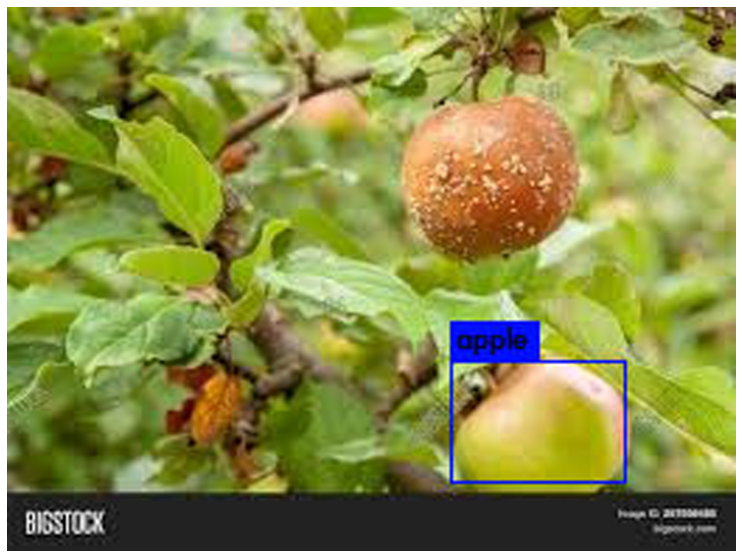

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/damaged_apple.jpg
imShow('predictions.jpg')
download('predictions.jpg')

# 5. Custom Yolo

In [18]:
!cp -r "/content/gdrive/My Drive/darknet/images" .

In [ ]:
# yolo training
#!./darknet detector train images/custom_data.data images/apple-train-yolo.cfg weights/darknet53.conv.74 -dont_show 

Streaming output truncated to the last 5000 lines.

 2535: 0.714885, 0.671325 avg loss, 0.001000 rate, 1.693236 seconds, 81120 images
Loaded: 0.000045 seconds

 2536: 0.930144, 0.697207 avg loss, 0.001000 rate, 1.695260 seconds, 81152 images
Loaded: 0.000031 seconds

 2537: 0.440599, 0.671547 avg loss, 0.001000 rate, 1.688915 seconds, 81184 images
Loaded: 0.000050 seconds

 2538: 0.865001, 0.690892 avg loss, 0.001000 rate, 1.698519 seconds, 81216 images
Loaded: 0.000057 seconds

 2539: 0.708615, 0.692664 avg loss, 0.001000 rate, 1.705540 seconds, 81248 images
Loaded: 0.000054 seconds

 2540: 0.666882, 0.690086 avg loss, 0.001000 rate, 1.701753 seconds, 81280 images
Resizing
480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000037 seconds

 2541: 0.565519, 0.677629 avg loss, 0.001000 rate, 1.907445 seconds, 81312 images
Loaded: 0.000038 seconds

 2542: 0.724422, 0.682308 avg loss, 0.001000 rate, 1.999939 seconds, 81344 images
Loaded: 0.000

In [ ]:
# check mAP
#!./darknet detector map images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_final.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
# check mAP
#!./darknet detector map images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_last.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
# check mAP
#!./darknet detector map images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_4000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
# check mAP
#!./darknet detector map images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_3000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
# check mAP
#!./darknet detector map images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_2000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [ ]:
# check mAP
#!./darknet detector map images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_1000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [11]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/gdrive/My Drive/darknet"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/gdrive/My Drive/darknet/backup/apple-train-yolo_final.weights" ./backup

In [12]:
!ls -al ./backup

total 240568
drwxr-xr-x 2 root root      4096 Jan 10 00:19 .
drwxr-xr-x 7 root root      4096 Jan 10 00:19 ..
-rw------- 1 root root 246326928 Jan 10 00:20 apple-train-yolo_final.weights


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

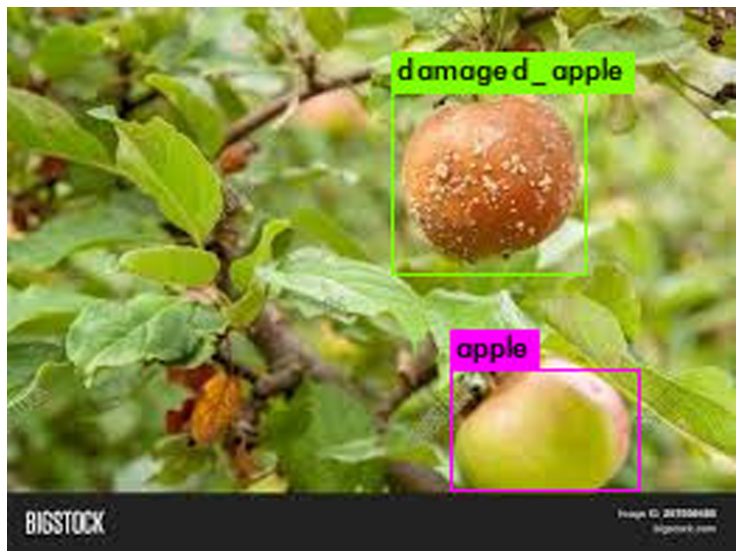

In [19]:
!./darknet detector test images/custom_data.data images/apple-train-yolo.cfg backup/apple-train-yolo_final.weights data/damaged_apple.jpg -dont-show

imShow('predictions.jpg')
#download('predictions.jpg')